In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
coffee_production = pd.read_csv("../Data/coffee/total-production.csv").T
coffee_production.columns = coffee_production.iloc[0]
coffee_production = coffee_production.drop('total_production')
coffee_production.tail()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
2014,39.405,99.8766,53304.7669,247.55,644.0112,10946.2773,501.4544,24.7098,797.5642,20.0725,...,106.2169,46.4478,35.7018,844.8871,143.2417,12.0013,3744.477,650.3983,26499.8404,178.3814
2015,40.515,84.2191,52870.5876,274.1017,644.4926,12585.4751,425.2061,21.2015,711.9818,20.0,...,127.0784,45.9276,36.1933,761.9808,80.9232,11.7897,3649.567,500.1259,28736.5941,156.246
2016,44.83,77.9835,56788.1784,248.7933,644.8845,11541.0266,420.8227,19.516,1171.1449,20.0101,...,120.1902,37.9217,36.7161,537.5435,23.2772,11.7911,4962.158,525.0,25540.2932,143.4533
2017,35.006,83.8112,52739.8635,202.1079,623.5744,10852.3153,408.7848,14.4703,733.9382,20.0024,...,104.5621,37.9464,36.7829,638.2325,114.7158,12.0009,4596.813,571.5128,27887.6555,132.1281
2018,40.3874,82.5687,62924.8836,178.4206,601.0001,9417.5942,396.3764,12.8493,930.369,20.0135,...,130.3021,30.9901,36.0659,482.0069,74.3319,12.3647,4703.964,525.2602,31174.0742,106.0735


In [3]:
top10_producers = coffee_production.sum().sort_values(ascending = False).iloc[:10]
top10_producers

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

# Coffee Production Stats

* Create a bar chart of the top 10 coffee producers by total production in 'total-production.csv', sorted from highest to lowest. Change the xticks to two letter country abbreviations.


* Data Prep Code

<mark style="background-color: #000000"> coffee_production = pd.read_csv("coffee/total-production.csv").T </mark> 

<mark style="background-color: #000000"> coffee_production.columns = coffee_production.iloc[0] </mark> 

<mark style="background-color: #000000"> coffee_production = coffee_production.drop("total_production") </mark> 


''

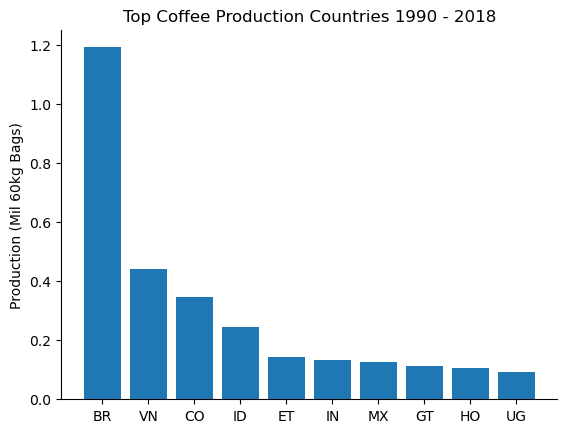

In [4]:
fig, ax = plt.subplots()
labels = ['BR', 'VN', 'CO', "ID", 'ET', 'IN', "MX", 'GT', 'HO', 'UG']
ax.bar(labels, height = top10_producers / 1000000)
ax.set_title("Top Coffee Production Countries 1990 - 2018")
ax.set_ylabel("Production (Mil 60kg Bags)", fontsize = 10)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
;

# Top 5 over time

* Create a line chart with the top 5 nations over time. Make sure to include a legend! Consider converting the index to datetime64[ns].

In [5]:
top5 =coffee_production.loc[:, ['Brazil', 'Viet Nam', 'Colombia', 'Indonesia', 'Ethiopia']]
top5.index = top5.index.astype('datetime64[ns]')
top5.index = top5.index.year

top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990,27285.6286,1310.288,14396.0,7441.383,2909.451
1991,27293.4934,1437.848,17980.397,8493.196,2924.664
1992,34603.3542,2340.447,14946.878,5569.478,1825.171
1993,28166.9786,3020.216,11422.422,6743.288,2967.004
1994,28192.047,3631.609,12964.0,5367.878,2762.73


''

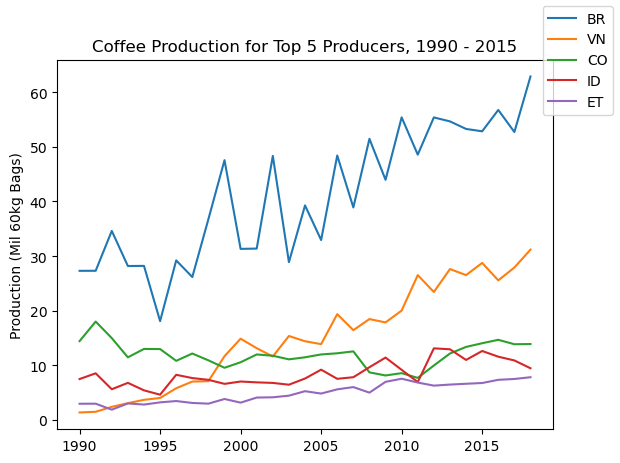

In [6]:
fig, ax = plt.subplots()

labels = ['BR', 'VN', 'CO', "ID", 'ET']
ax.plot(top5 / 1000)
fig.legend(labels)
ax.set_title("Coffee Production for Top 5 Producers, 1990 - 2015")
ax.set_ylabel("Cumulative Production (Mil 60kg Bags", fontsize = 10)

ax.set_ylabel("Production (Mil 60kg Bags)", fontsize = 10)
;

# COMPOSITION OVER TIME

Our client is interested in looking at how Brazil's share of global coffee production has changed over time.

Build a plot that global total production as well as Brazil's contribution to global production over time.

In [7]:
brazil_vs_others = coffee_production
brazil_vs_others['Global Production'] = coffee_production.sum(axis=1)
brazil_vs_others = brazil_vs_others.drop(brazil_vs_others.iloc[:, np.r_[0:2, 3:56]], axis = 1)

brazil_vs_others.head(1)

total_production,Brazil,Global Production
1990,27285.6286,93230.0596


In [8]:
brazil_vs_others2 = (coffee_production
                    .assign(rest_of_world = coffee_production
                           .drop('Brazil', axis = 1).sum(axis = 1))
                    .loc[:, ['Brazil', 'rest_of_world']])
brazil_vs_others2.head()

total_production,Brazil,rest_of_world
1990,27285.6286,159174.4906
1991,27293.4934,175239.8754
1992,34603.3542,162448.4442
1993,28166.9786,155362.2646
1994,28192.047,158434.3410


''

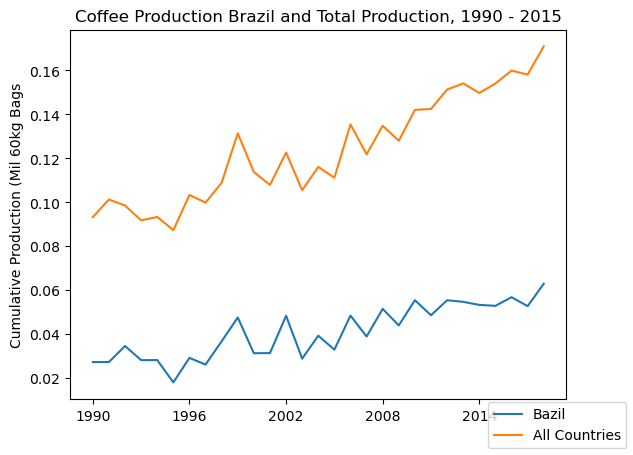

In [9]:
fig, ax = plt.subplots()

labels = ['Bazil', 'All Countries']
ax.plot(brazil_vs_others / 1000000)
fig.legend(labels, loc = 'lower right')
ax.set_title("Coffee Production Brazil and Total Production, 1990 - 2015")
ax.set_ylabel("Cumulative Production (Mil 60kg Bags", fontsize = 10)
ax.xaxis.set_major_locator(plt.MaxNLocator(6))

;

## PRODUCTION RELATIONSHIPS

We want to explore how Brazil compares to its competitors in terms of production. Build a scatterplot  comparing Brazil Vs. VietNam Production and one comparing Brazil to Venezuela.

In [10]:
ba_vz = coffee_production[['Brazil', 'Venezuela']]
ba_vn = coffee_production[['Brazil', 'Viet Nam']]
ba_vz.head(1)

total_production,Brazil,Venezuela
1990,27285.6286,1122.477


''

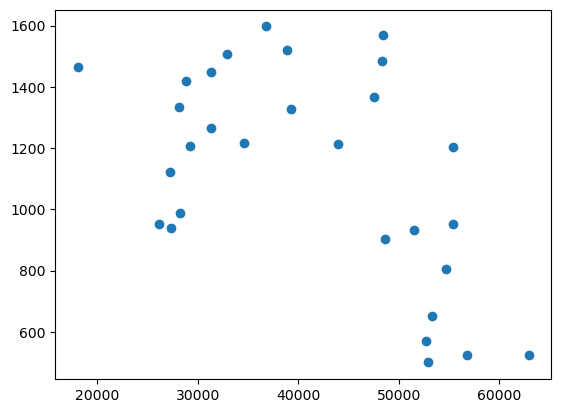

<Figure size 400x400 with 0 Axes>

In [11]:
fig, ax = plt.subplots()
plt.figure(figsize = (4,4))

ax.scatter(ba_vz['Brazil'], ba_vz["Venezuela"])

;

''

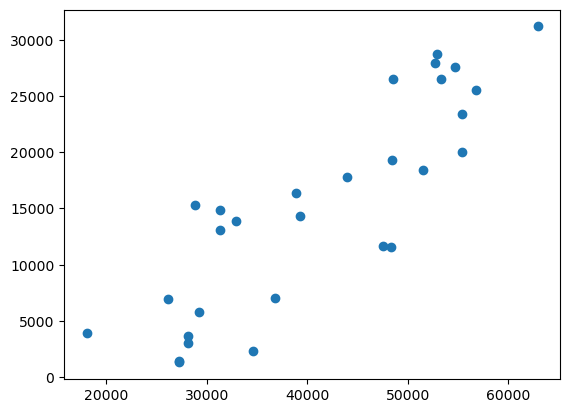

<Figure size 800x800 with 0 Axes>

In [12]:
fig, ax = plt.subplots()
plt.figure(figsize = (8,8))
ax.scatter(ba_vn['Brazil'],ba_vn["Viet Nam"])
;

# COMPOSITION OF COFFEE PRODUCTION

* Create a Pie chart with the top 5 producers, as well as the sum for the rest of countries.

* Finally, create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018.

In [14]:
production_sum = coffee_production.T
production_sum = production_sum.apply(pd.to_numeric)
production_sum = production_sum.drop(['Global Production'])
production_sum['total'] = production_sum.sum(axis = 1)
production_sum = production_sum.drop(production_sum.iloc[:,:29], axis = 1).reset_index()
production_sum.loc['x'] = production_sum.sum(numeric_only=True, axis=0)
production_sum.fillna('All Countries', inplace = True)
production_sum = production_sum.sort_values(by ='total', ascending = False)[:6].set_index(['total_production'])
production_sum

,total
total_production,
All Countries,3.588429e+06
Brazil,1.190966e+06
Viet Nam,4.395410e+05
Colombia,3.458714e+05
Indonesia,2.451168e+05
Ethiopia,1.415429e+05


In [15]:
coffee_production["Rest of World"] = coffee_production.drop(["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",], axis=1).sum(axis=1)

coffee_production_top5_2018 = coffee_production.loc['2018', ["Brazil", 
                                                             "Viet Nam", 
                                                             "Colombia", 
                                                             "Indonesia",
                                                             "Ethiopia",
                                                             "Rest of World"
                                                            ]
                                                   ]

coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia          13857.962
Indonesia         9417.5942
Ethiopia          7776.2234
Rest of World    216722.738
Name: 2018, dtype: object

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

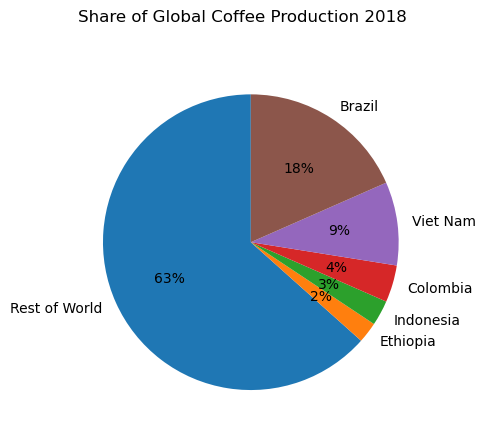

In [18]:
fig, ax = plt.subplots()

ax.pie(coffee_production_top5_2018[::-1],
       autopct="%.0f%%",
       labels=list(coffee_production_top5_2018.index[::-1]),
       startangle=90
      )

fig.suptitle("Share of Global Coffee Production 2018")

# Coffee Consumption Vs. Prices

Compare coffee prices with coffee consumption in the following countries. 

Is there a relationship between coffee consumption and the price these countries pay?

Plot a dual axis bar chart of price vs consumption totals for these countries.

In [33]:
consumption = pd.read_csv("../Data/coffee/imports.csv").set_index('imports').mean(axis = 1)
consumption.name = 'imports'

consumption.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
Name: imports, dtype: float64

In [34]:
prices = pd.read_csv("../Data/coffee/retail-prices.csv").set_index('retail_prices').mean(axis = 1)

prices.head()

retail_prices
   Austria    11.571135
   Cyprus     10.437695
   Denmark    10.494025
   Finland     7.211692
   France      6.850879
dtype: float64

In [35]:
price_cons = (pd.DataFrame(prices).merge(
    consumption, left_on=prices.index,
    right_on = consumption.index,
    how = 'inner').sort_values(['imports'], ascending = False)
             )
price_cons.columns = ['country', 'price', 'imports']

price_cons['country'] = price_cons['country'].str.strip(' ')
price_cons

,country,price,imports
5,Germany,9.515110,16357.666667
11,Japan,21.472939,6862.275235
6,Italy,14.199589,6696.958333
4,France,6.850879,6512.458333
9,Spain,8.029992,4046.291667
7,Netherlands,8.931263,2928.125000
10,Sweden,8.054350,1620.625000
0,Austria,11.571135,1551.083333
3,Finland,7.211692,1157.541667
2,Denmark,10.494025,991.791667


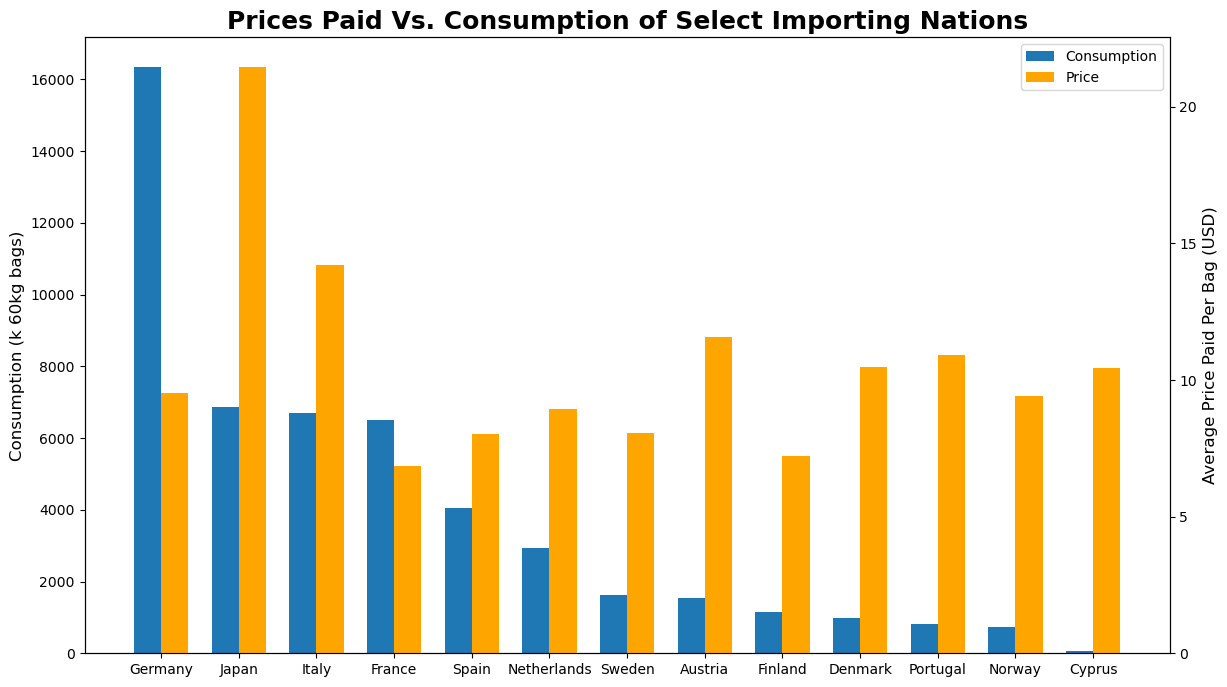

In [38]:
fig, ax = plt.subplots(figsize = (14, 8))

width = .35
x = np.arange(0, len(price_cons['country']))

bar1 = ax.bar(x-width/2, price_cons['imports'], width = width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)

ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons['price'], width= width, color = 'orange')
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"])

plt.show()